In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
import sys
sys.path.append("..")

In [37]:
result = [1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 10.0, 10.0, 10.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0]
print(len(result)) 


29


In [38]:
from motif.sax import SAX
from motif.sequitur import Sequitur
from motif.sequitur_anomaly import SequiturAnomaly

timestamped_series = np.array(result)
series = timestamped_series
sax = SAX(alpha = 4, symbol_size = 0, paa_size = 3, window_size = 3)
words = sax.encode(series)


In [39]:
print(words[0:10])
seq = Sequitur()
seq.induce(words)
anomaly = SequiturAnomaly(seq, density_threshold = 1)
anomalies = anomaly.detect(words)
print(anomalies)


['aad' 'add' 'aad' 'add' 'dda' 'daa' 'dda' 'daa' 'aad' 'add']
last S: R0005R0005R0001R0001cccR0006R0002
[[20, 21]]


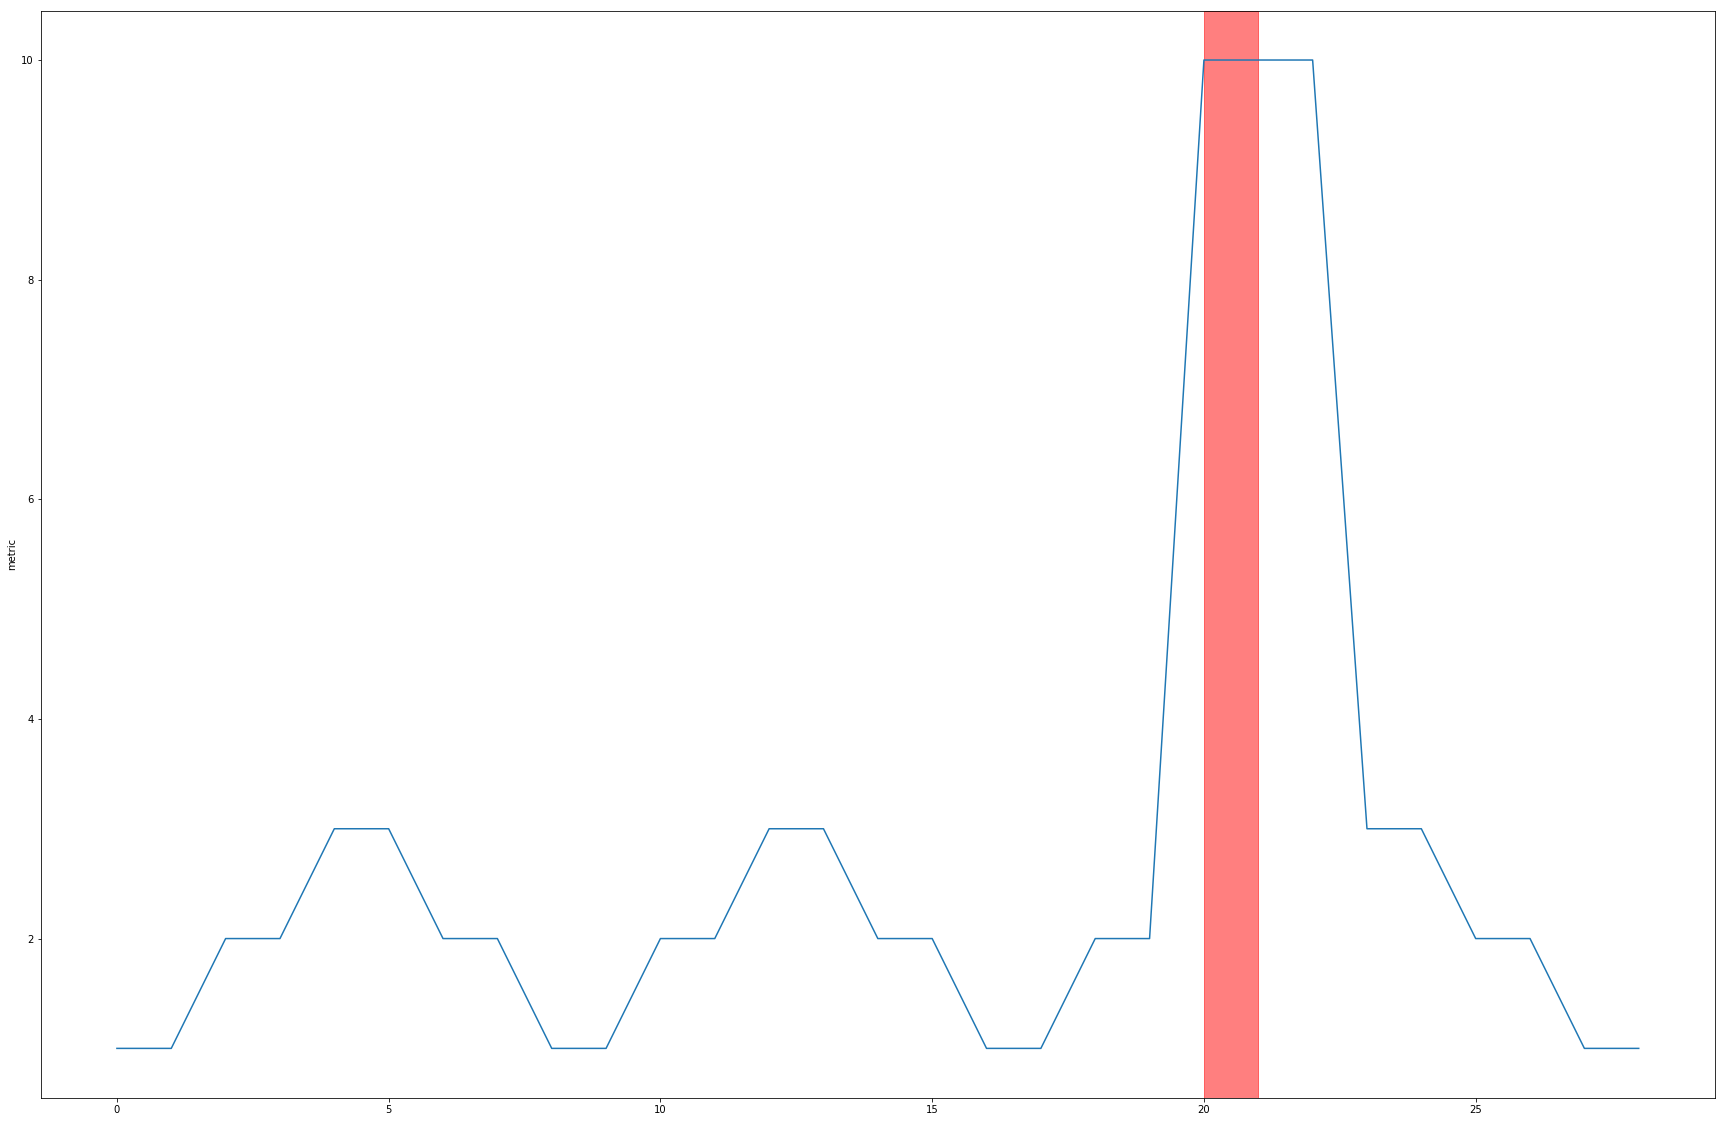

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plt.plot(series)
plt.ylabel('metric')
for an in anomalies:
    plt.axvspan(an[0], an[1], alpha=0.5, color='red')
plt.show()

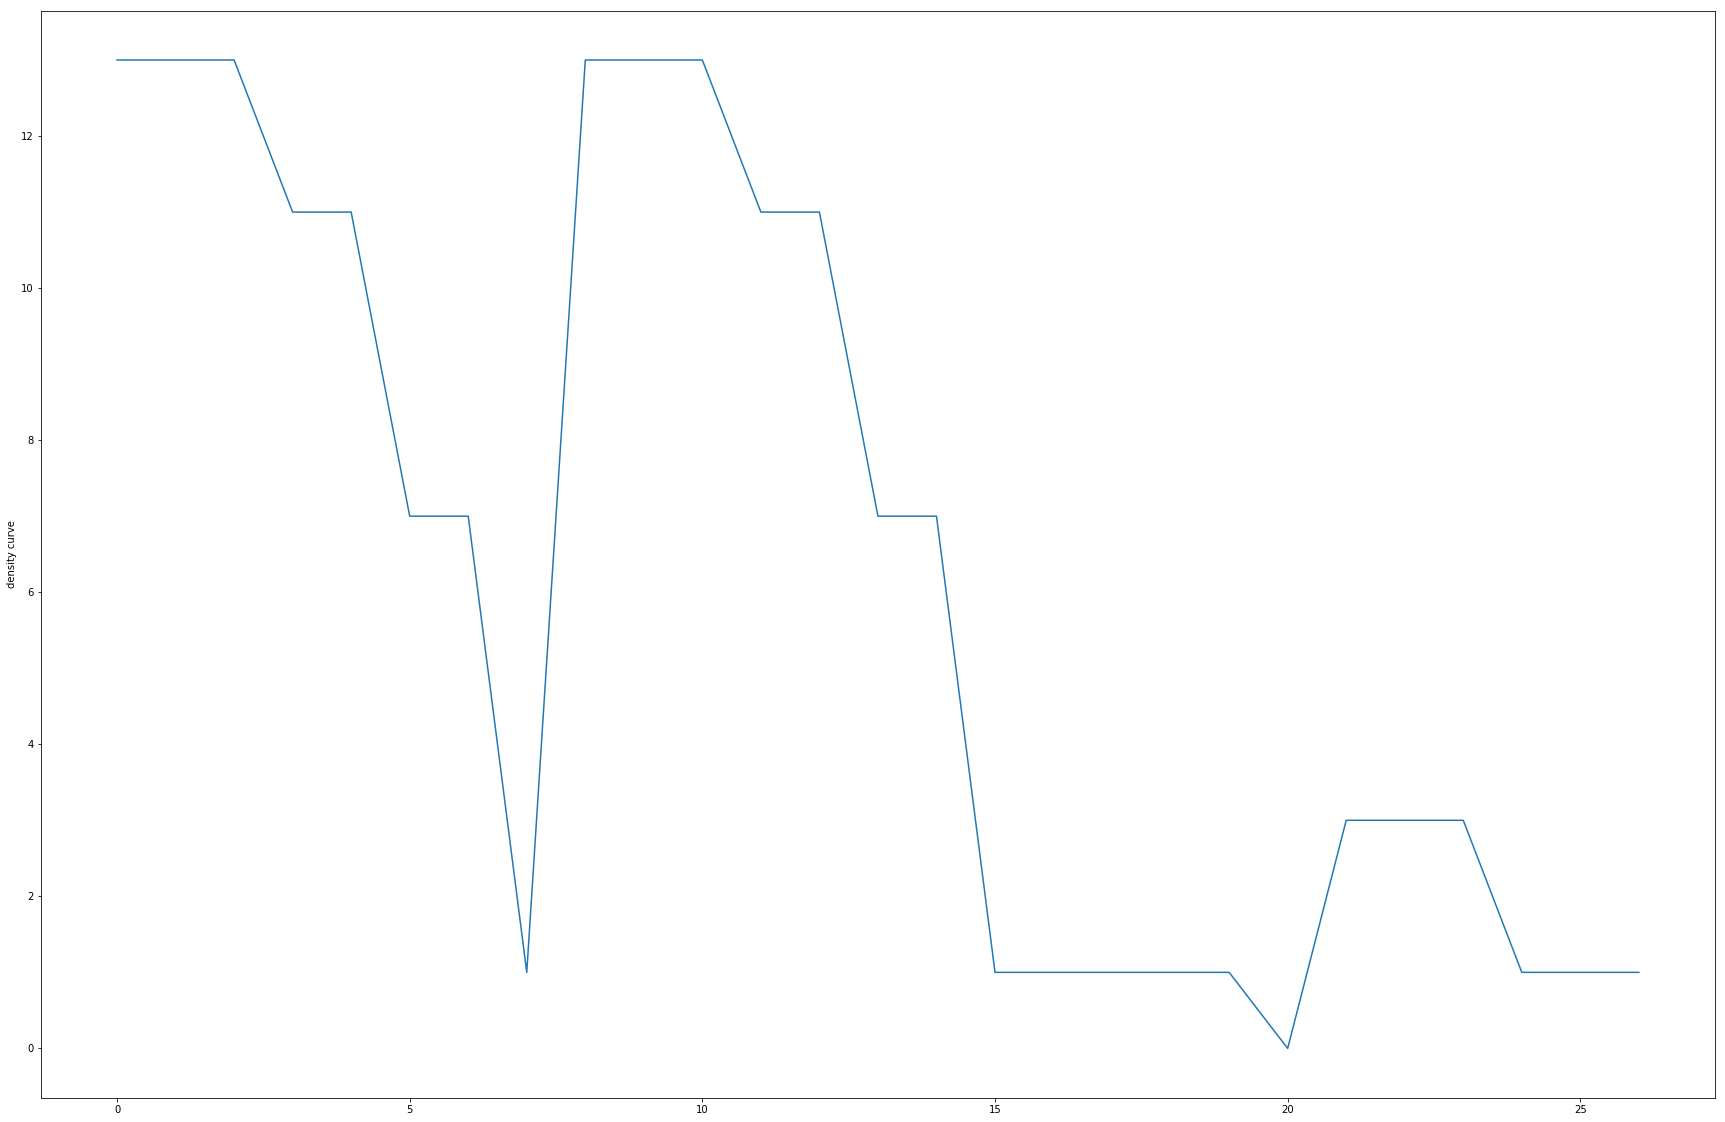

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plt.plot(anomaly.density_curve)
plt.ylabel('density curve')
plt.show()